# Logistic Regresssion on IRIS data set 

### Loading IRIS Dataset from Sklearn Machine Learning Library

In [2]:
#adding support for large, multi-dimensional arrays and matrices, along with a 
#large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [3]:
#  importing the sample dataset  
from sklearn.datasets import load_iris

In [4]:
#free software machine learning library for the Python programming language.
#It features various classification, regression and clustering algorithms including support vector machines
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
# input data
X_iris = iris.data
# output data. this is response variable. Our model will predict the species classification 
y_iris = iris.target

#Check the shape of data
print (X_iris.shape)
print (y_iris.shape)

(150, 4)
(150,)


In [17]:
# Creating the instance of sklearn algorithm
logistic = LogisticRegression()

In [18]:
# Library to split the data set on traing and test data set.

# Model building process is to split the data and training the model on training data set and test it on test dataset.
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_iris, y_iris, test_size=0.35, random_state=0)

In [20]:
# build the model
logistic.fit(X_iris,y_iris)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Accuracy on training data set
accuracy = logistic.score(X_test, Y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.9433962264150944


In [24]:

print('Predicted class')
print(logistic.predict(iris.data[-1,:].reshape(-1,4)))
print('Actual Class')
print(iris.target[-1])


Predicted class
[2]
Actual Class
2


### Loading IRIS Dataset from csv

In [7]:
import pandas as pd
iris_csv_df=pd.read_csv('Iris.csv')
#now use this to see the preview values
iris_csv_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


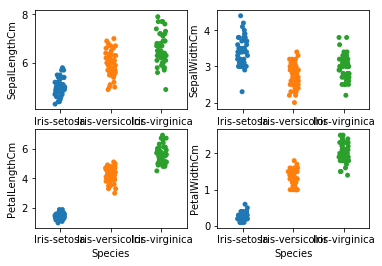

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplot(2,2,1)
sns.stripplot(x="Species", y="SepalLengthCm", data=iris_csv_df, jitter=True)
plt.subplot(2,2,2)
sns.stripplot(x="Species", y="SepalWidthCm", data=iris_csv_df, jitter=True)
plt.subplot(2,2,3)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris_csv_df, jitter=True)
plt.subplot(2,2,4)
sns.stripplot(x="Species", y="PetalWidthCm", data=iris_csv_df, jitter=True)

In [9]:
# let's drop Id column because we don't need it
iris_csv_df = iris_csv_df.drop('Id', axis=1)
# convert Species name to numerical value
# Iris setosa = 1
# Iris versicolor = 2
# Irsi virginica = 3
iris_csv_df['Species'] = iris_csv_df['Species'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1, 2, 3])
# now let's print some of the data
iris_csv_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:

# X is our features ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = iris_csv_df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# y is our labels
y = iris_csv_df.loc[:, ['Species']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [30]:
print(Y_train.shape)

(97, 1)


In [31]:
#Return a contiguous flattened array. As we need to pass the flattened array to fir model.
print(np.ravel(Y_train).shape)

(97,)


In [32]:
logistic_model.fit(X_train,np.ravel(Y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
accuracy = logistic_model.score(X_test, Y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.8867924528301887


In [34]:
iris_csv_df.loc[50]

SepalLengthCm    7.0
SepalWidthCm     3.2
PetalLengthCm    4.7
PetalWidthCm     1.4
Species          2.0
Name: 50, dtype: float64

In [35]:
print('Predicted class')
print(logistic_model.predict(iris_csv_df.loc[60][0:4].values.reshape(-1,4)))
print('Actual Class')
print(iris_csv_df.loc[60][4])

Predicted class
[2]
Actual Class
2.0
